In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [32]:
# creating syhthetic classification

from sklearn.datasets import make_classification

In [50]:
X,y =make_classification(n_samples=1000,n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [51]:
X

array([[-0.00711065,  0.09727859],
       [ 0.38215945, -0.42374624],
       [-0.16975847,  0.58822438],
       ...,
       [-1.68764335,  0.82191076],
       [-1.05823044,  1.07026238],
       [-0.03805446,  2.27733395]])

In [52]:
y

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [53]:
#plot the graph for classification

pd.DataFrame(X)

,0,1
0,-0.007111,0.097279
1,0.382159,-0.423746
2,-0.169758,0.588224
3,-2.670541,-1.780548
4,1.415284,0.774054
...,...,...
995,0.705711,1.296358
996,-1.623343,0.710652
997,-1.687643,0.821911
998,-1.058230,1.070262


<Axes: xlabel='0', ylabel='1'>

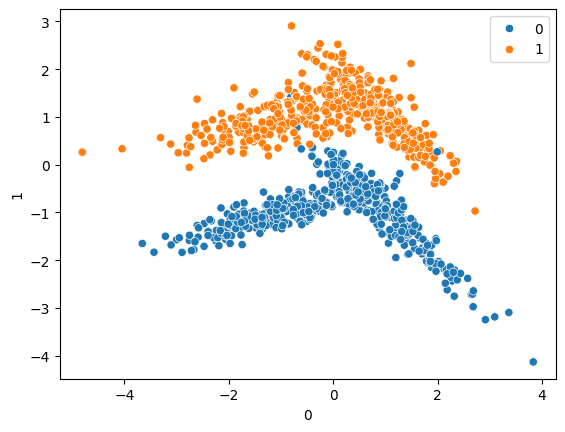

In [54]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [55]:
from sklearn.svm import SVC

In [56]:
svc=SVC(kernel='linear')


In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [58]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [59]:
## prediction
y_pred = svc.predict(X_test)

In [60]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96       101

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

[[96  5]
 [ 3 96]]
0.96


In [74]:
rbf = SVC(kernel='rbf')


In [75]:
rbf.fit(X_train,y_train)

SVC()

In [76]:
y_pred=rbf.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [78]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred, y_test))

[[ 97   0]
 [  2 101]]
0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        97
           1       1.00      0.98      0.99       103

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [79]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid = {
            'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf','poly','sigmoid','linear']

}

In [82]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [83]:
grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [84]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.994 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.981 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.831 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoi

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             verbose=3)

In [85]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [87]:
y_pred = grid.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        99
           1       0.98      0.98      0.98       101

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

0.98
[[97  2]
 [ 2 99]]
